## Description Cell
[describe the contents of this notebook]

## Imports

In [38]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.manifold
import matplotlib

___
## Load Data

In [2]:
## Currenctly not working data loader
BASE_DIR = "/home/sean/Code/Pawsey/oxford_data/"

def load_data(name):
    """Returns a dictionary of attributes and 1 of features for train or test data"""

    attributes = {}
    
    for img_att in ["names", "pixels", "images"]:
        attributes[img_att] = np.load(BASE_DIR + name + "_" + img_att + ".npy", allow_pickle=True)

    features = {}

    os.chdir(BASE_DIR + "NPY files for BoVW/")
    for bovw_size in os.listdir():
        features[bovw_size] = pd.DataFrame(np.load(bovw_size + "/BoW_" + name.capitalize() + ".npy"))
    
    return(attributes, features)

(test_attributes, test_features) = load_data("test")
(train_attributes, train_features) = load_data("train")
test_features

{'bovw files for 10000 Words':         0         1         2         3         4         5         6     \
 0   0.000000  0.000000  0.000000  0.013564  0.067083  0.012139  0.000000   
 1   0.000000  0.000000  0.000000  0.000000  0.039283  0.009478  0.000000   
 2   0.000000  0.000000  0.000000  0.000000  0.040398  0.000000  0.000000   
 3   0.022082  0.010166  0.000000  0.008988  0.016670  0.008044  0.000000   
 4   0.000000  0.000000  0.000000  0.013820  0.111068  0.012368  0.000000   
 5   0.000000  0.000000  0.238402  0.000000  0.028570  0.013786  0.000000   
 6   0.000000  0.000000  0.000000  0.008276  0.076744  0.000000  0.000000   
 7   0.014843  0.000000  0.000000  0.000000  0.029881  0.000000  0.000000   
 8   0.000000  0.000000  0.099731  0.000000  0.007083  0.000000  0.000000   
 9   0.000000  0.000000  0.000000  0.017401  0.010757  0.000000  0.000000   
 10  0.012388  0.011406  0.000000  0.000000  0.018704  0.027075  0.000000   
 11  0.000000  0.000000  0.000000  0.025740  0

____
## Investigate Sparseness

In [19]:
def describe_sparsity(df):
    """Return information about how the sparse the rows of a df are: histogram, average and standard deviation of the proportion of non-zero cells in each vector"""
    sparsities = df.apply(sparsity, axis=1)
    print("Mean: {} \nStdev {}".format(np.mean(sparsities), np.std(sparsities)))
    plt.hist(sparsities)
    return()  

def sparsity(vector):
    """Return the proportion of non-zero elements in the vector."""
    return(sum(np.array(vector)==0) / len(vector))

if sparsity([1,1,1,0]) != 0.25 or sparsity([0.00001,0.23,0,0,0]) != 0.6:
    raise ValueError("Function not working as expected")
else:
    print("All seems to be in order!")

All seems to be in order!


bovw files for 10000 Words
Mean: 0.7898049382716055 
Stdev 0.06388915812466167
bovw files for 10 Words
Mean: 0.0 
Stdev 0.0
bovw files for 100 Words
Mean: 0.003703703703703703 
Stdev 0.025128320490867443
bovw files for 20000 Words
Mean: 0.8710313932980601 
Stdev 0.04388720754664326
bovw files for 100000 Words
Mean: 0.9673866843033512 
Stdev 0.01255584764139045
bovw files for 1000 Words
Mean: 0.4029523809523814 
Stdev 0.0857029827938513
bovw files for 50000 Words
Mean: 0.9393712522045846 
Stdev 0.022510205242390793


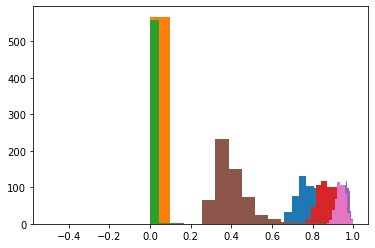

In [20]:
for (name, features) in train_features.items():
    print(name)
    describe_sparsity(features)

_____
## Investigate Feature Distributions

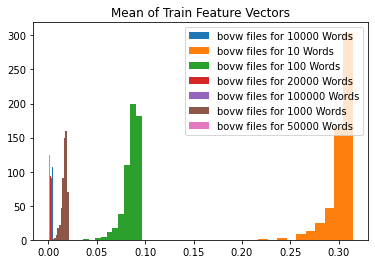

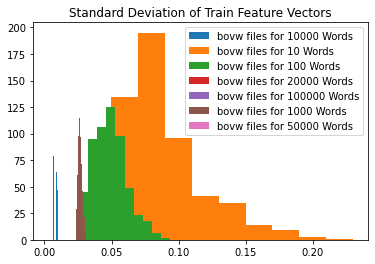

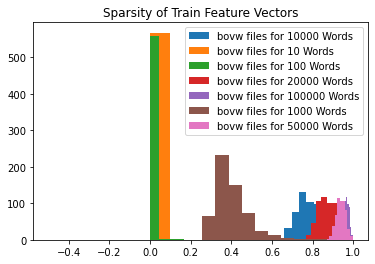

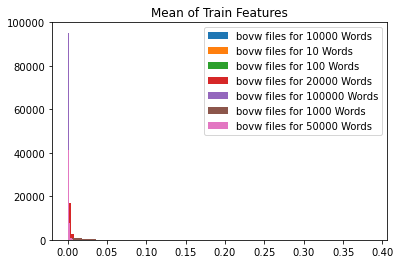

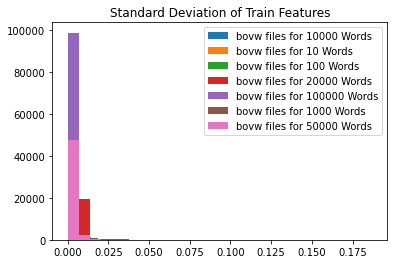

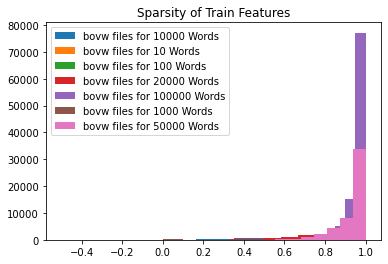

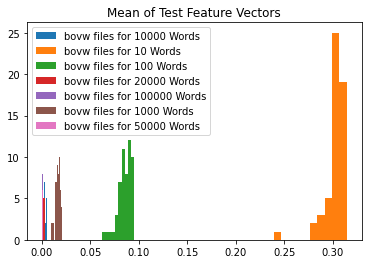

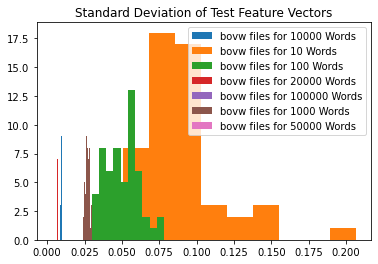

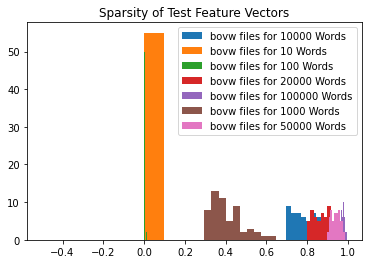

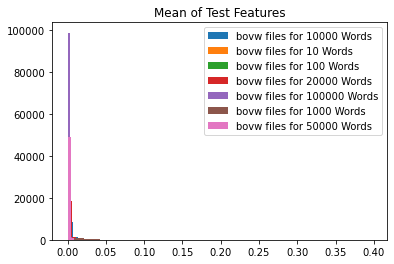

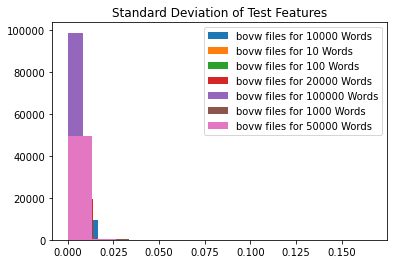

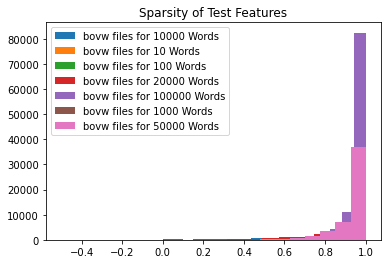

In [24]:
for (feature_set, feature_set_name) in [(train_features, "Train"), (test_features, "Test")]:
    for (axis_name, axis) in [("Feature Vectors", 1), ("Features", 0)]:
        for (metric_name, metric_method) in [("Mean", np.mean), ("Standard Deviation", np.std), ("Sparsity", sparsity)]:
            for (features_name, features) in feature_set.items():
                axis_metrics = features.apply(metric_method, axis=axis)
                plt.hist(axis_metrics, label=features_name)
            plt.title("{} of {} {}".format(metric_name, feature_set_name, axis_name))
            plt.legend()
            plt.show()

        



____
## Normalisation

In [23]:
train_feature_norm = {} # normalising the columns
train_vector_norm = {} # normalising the rows

for (bovw_size, features) in train_features.items():
    train_feature_norm[bovw_size] = sklearn.preprocessing.normalize(features, axis=0)
    train_vector_norm[bovw_size] = sklearn.preprocessing.normalize(features, axis=1)

_____
## TSNE

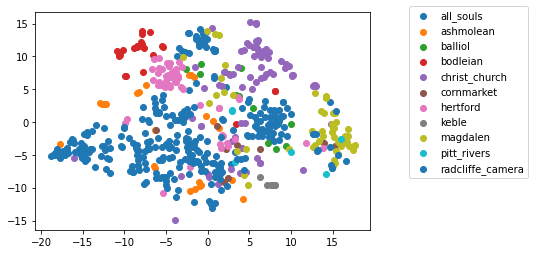

In [57]:
def TSNE_visualisation(data, names, metric= "euclidean", title=None):
    """Create a colour coded TSNE representation of the data."""

    tsne = sklearn.manifold.TSNE(n_components=2, perplexity=40, n_iter=300, metric=metric)
    tsne_results = tsne.fit_transform(data)

    for name in np.unique(names):
        mask = np.array(names) == name
        plt.scatter(tsne_results[:,0][mask], tsne_results[:,1][mask], label=name) 
    
    if title: plt.title(title)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

TSNE_visualisation(train_features["bovw files for 100 Words"], train_attributes["names"])


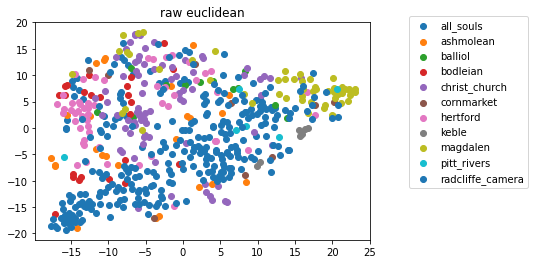

/home/sean/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


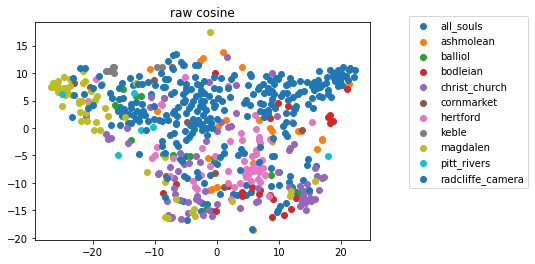

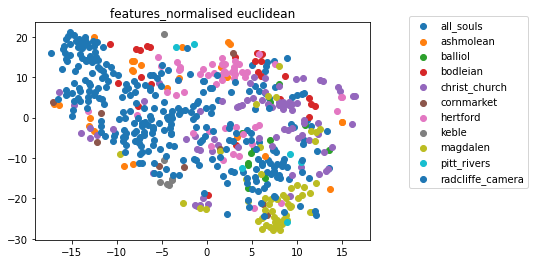

/home/sean/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


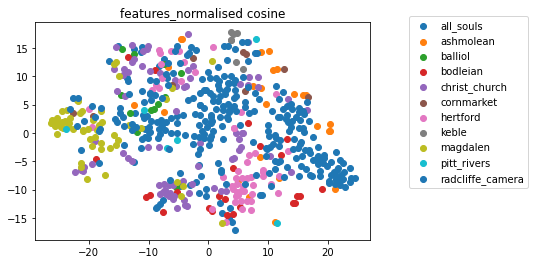

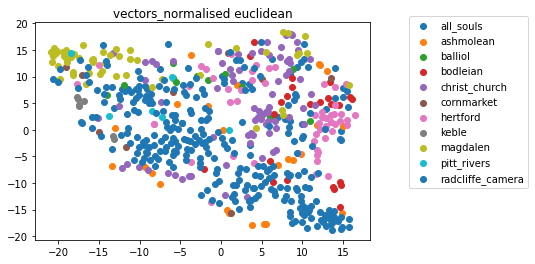

/home/sean/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


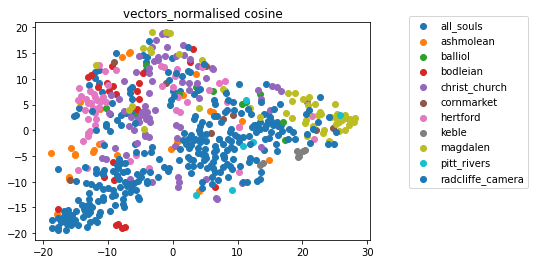

In [56]:
bovw_size = "bovw files for 100 Words"

for (data_set, label) in [(train_features, "raw"), (train_feature_norm, "features_normalised"), (train_vector_norm, "vectors_normalised")]:
    for metric in ["euclidean", "cosine"]:
        TSNE_visualisation(data=data_set[bovw_size], names=train_attributes["names"], metric=metric, title = label + " " + metric)